In [1]:
!pip install vaderSentiment import pandas as pd
import os
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


In [3]:
import pandas as pd
newsdata = pd.read_csv ('C:/Users/swarn/Downloads/india-news-headlines.csv')
newsdata.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [4]:
newsdata.drop('headline_category', axis = 1, inplace=True)
newsdata['Date'] = pd.to_datetime(newsdata['publish_date'],format= '%Y%m%d')
newsdata.drop('publish_date', axis = 1, inplace=True)
newsdata

,headline_text,Date
0,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,Fissures in Hurriyat over Pak visit,2001-01-02
2,America's unwanted heading for India?,2001-01-02
3,For bigwigs; it is destination Goa,2001-01-02
4,Extra buses to clear tourist traffic,2001-01-02
...,...,...
3650965,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31
3650966,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31
3650967,As Covid-19 cases drop to nil in southern dist...,2022-03-31
3650968,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31


In [6]:
!pip install yfinance
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,0.0,0.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,0.0,0.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,0.0,0.0


<Axes: xlabel='Date'>

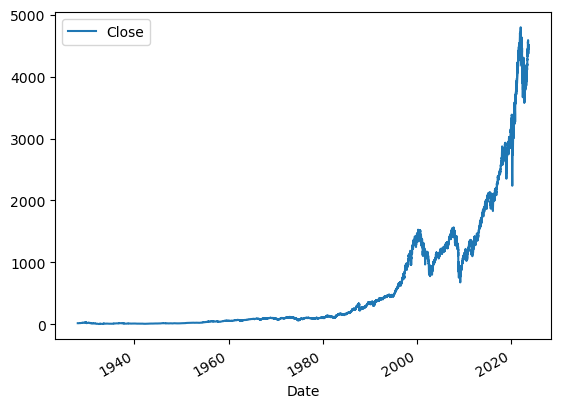

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000


In [9]:
newsdata['Date'] = pd.to_datetime(newsdata['Date']) 
newsdata1 = newsdata[newsdata['Date'] >= '2001-09-11 '].copy()
newsdata1

,headline_text,Date
26508,Newly born abandoned; adopted by couple,2001-09-11
26509,'I'd love to make parathas for my husband',2001-09-11
26510,Sub-inspector's bail plea opposed,2001-09-11
26511,Game for Black Jack?,2001-09-11
26512,Jaya orders probe into copra procurement,2001-09-11
...,...,...
3650965,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31
3650966,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31
3650967,As Covid-19 cases drop to nil in southern dist...,2022-03-31
3650968,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31


In [10]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1


In [12]:
sp500 = sp500.loc["2001-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2001-01-02 00:00:00-05:00,1320.280029,1320.280029,1276.050049,1283.270020,1129400000,1347.560059,1
2001-01-03 00:00:00-05:00,1283.270020,1347.760010,1274.619995,1347.560059,1880700000,1333.339966,0
2001-01-04 00:00:00-05:00,1347.560059,1350.239990,1329.140015,1333.339966,2131000000,1298.349976,0
2001-01-05 00:00:00-05:00,1333.339966,1334.770020,1294.949951,1298.349976,1430800000,1295.859985,0
2001-01-08 00:00:00-05:00,1298.349976,1298.349976,1276.290039,1295.859985,1115500000,1300.800049,1
...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1


In [29]:
#random forest works by training a few individual decision trees with randomized paramenters,
#and then averaging those results from those decision trees
# so because of this process randomforest is resistant to overfit, theyre fast in running,
#they can pickup non linear tendencies from the data
#in stock market its hard to find data w linea relationship cause if we find a linear rel we can make alot of money
#inititaing the mode=. n_est=no.of decision tree we train, minsamplesplit helps against overfitiing
#random state=1 means if we run the model n numbr of times we get the same result
#in time series we do not use cross validation 
#bcz that would use future data to predictt the past bcz it does not take  the time series nature into accounfrom sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

<Axes: xlabel='Date'>

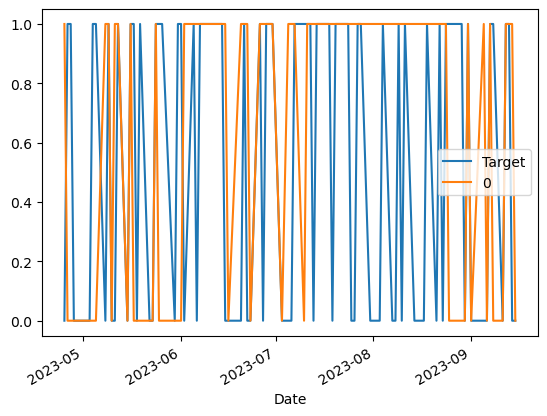

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()
#blue=1=what happened .... orange=0=what we predicted

In [19]:
#backtesting system for accuracy
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()#before curr year
        test = data.iloc[i:(i+step)].copy()#current year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts()

0    1761
1    1451
Name: Predictions, dtype: int64

In [20]:
precision_score(predictions["Target"], predictions["Predictions"])

#this means that the stock price only went up 48% of the time, which is not very good

0.5361819434872501

In [21]:
predictions["Target"].value_counts() / predictions.shape[0] 
#1=market goes up we compare it w our model predictions to calculate error
#buy and sell at the end of the day

1    0.540162
0    0.459838
Name: Target, dtype: float64

In [22]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2004-12-28 00:00:00-05:00,1204.920044,1213.540039,1204.920044,1213.540039,983000000,1213.449951,0,1.003564,1.0,1.003986,4.0,1.045565,35.0,1.074322,140.0,1.134291,507.0
2004-12-29 00:00:00-05:00,1213.540039,1213.849976,1210.949951,1213.449951,925900000,1213.550049,1,0.999963,1.0,1.002584,3.0,1.044313,34.0,1.073856,139.0,1.134349,506.0
2004-12-30 00:00:00-05:00,1213.449951,1216.469971,1213.410034,1213.550049,829800000,1211.920044,0,1.000041,1.0,1.002008,3.0,1.043216,35.0,1.073546,140.0,1.134569,507.0
2004-12-31 00:00:00-05:00,1213.550049,1217.329956,1211.650024,1211.920044,786900000,1202.079956,0,0.999328,1.0,1.000367,2.0,1.040773,34.0,1.071764,139.0,1.133137,507.0
2005-01-03 00:00:00-05:00,1211.920044,1217.800049,1200.319946,1202.079956,1510800000,1188.050049,0,0.995924,0.0,0.992710,2.0,1.031268,34.0,1.062767,138.0,1.124035,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,4461.899902,0,1.003350,2.0,1.003529,2.0,1.005383,30.0,1.095670,120.0,1.160684,530.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,4467.439941,1,0.997144,1.0,0.999374,2.0,0.999522,29.0,1.088867,120.0,1.153634,530.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1,1.000620,1.0,1.000527,3.0,1.000547,30.0,1.089664,120.0,1.154626,531.0


In [23]:

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"]) #we're trying to predict the target
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
predictions = backtest(sp500, model, new_predictors)
predictions["Predictions"].value_counts()

0.0    1799
1.0     413
Name: Predictions, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.48668280871670705

In [25]:

predictions["Target"].value_counts() / predictions.shape[0]

1    0.530741
0    0.469259
Name: Target, dtype: float64

In [26]:
predictions

,Target,Predictions
Date,,
2014-12-02 00:00:00-05:00,1,0.0
2014-12-03 00:00:00-05:00,0,0.0
2014-12-04 00:00:00-05:00,1,0.0
2014-12-05 00:00:00-05:00,0,0.0
2014-12-08 00:00:00-05:00,0,1.0
...,...,...
2023-09-11 00:00:00-04:00,0,0.0
2023-09-12 00:00:00-04:00,1,0.0
2023-09-13 00:00:00-04:00,1,0.0
